In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Perceptron

# Failed XOR using single layer Perceptron

In [4]:
X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])
y = np.array([1, 0, 0, 1])
    

In [5]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [6]:
per_clf.predict(X)

array([0, 0, 0, 0])

In [7]:
X = np.vstack([X]*100)
y = np.hstack([y]*100)

In [8]:
print(X.shape, y.shape)

(400, 2) (400,)


In [9]:
per_clf.fit(X, y)
per_clf.predict([[0, 0], 
                [0, 1], 
                [1, 0], 
                [1, 1]])

array([1, 0, 1, 0])

# Tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


# Building a Neural Classifier using Sequential API

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [12]:
X_train_full.shape

(60000, 28, 28)

In [13]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [15]:
class_names[y_train[400]]

'T-shirt/top'

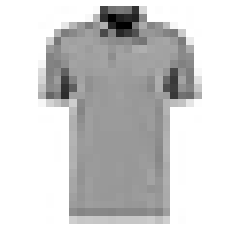

In [16]:
plt.imshow(X_train[400], cmap="binary", interpolation="nearest")
plt.axis('off')
plt.show()

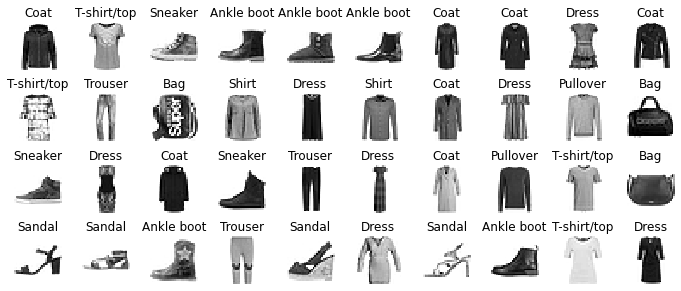

In [17]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [18]:
from tensorflow.keras.layers import Dense, Flatten

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
model = keras.models.Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.layers

In [24]:
hidden1 = model.layers[1]

In [25]:
hidden1.name

'dense'

In [26]:
weights, biases = hidden1.get_weights()

In [27]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [28]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
biases.shape

(300,)

In [30]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["accuracy"])

In [31]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.7239 - accuracy: 0.7643 - val_loss: 0.5219 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4842 - accuracy: 0.8320 - val_loss: 0.4352 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4389 - accuracy: 0.8456 - val_loss: 0.5333 - val_accuracy: 0.7990
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4121 - accuracy: 0.8563 - val_loss: 0.3920 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3937 - accuracy: 0.8621 - val_loss: 0.3749 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3750 - accuracy: 0.8678 - val_loss: 0.3726 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3630 - accuracy: 0.8713 - val_loss: 0.3622 - val_acc

In [32]:
X_train.shape

(55000, 28, 28)

In [33]:
X_valid.shape

(5000, 28, 28)

In [34]:
history.params.keys()

dict_keys(['verbose', 'epochs', 'steps'])

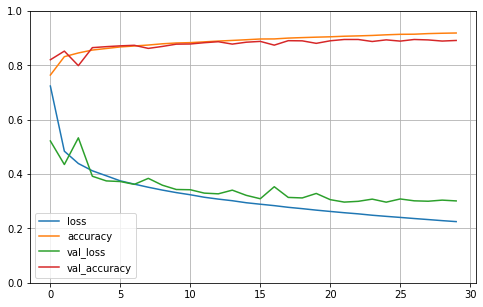

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3353 - accuracy: 0.8825


[0.3352612853050232, 0.8824999928474426]

In [37]:
X_new = X_test[:4]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [38]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, 1])

In [39]:
y_test[:4]

array([9, 2, 1, 1], dtype=uint8)

In [40]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser'], dtype='<U11')

# Building a Neural Regressor using Sequential API

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4875 - val_loss: 0.4656

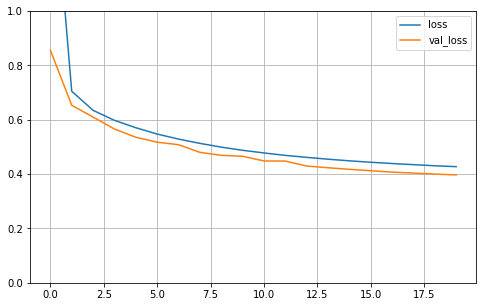

In [44]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [46]:
X_train.shape

(11610, 8)

In [47]:
y_pred

array([[0.38856646],
       [1.6792021 ],
       [3.1022797 ]], dtype=float32)

In [48]:
y_test[:3].reshape(-1, 1)

array([[0.477  ],
       [0.458  ],
       [5.00001]])

In [49]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test[:3], y_pred)

1.069121984167099

# Building Complex Models Using the Functional API

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:


input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [10]:
print(type(input_))
print(input_)

<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("input_2:0", shape=(None, 8), dtype=float32)


In [52]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [53]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-4), metrics=["mean_absolute_error"])
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/40
363/363 [==============================] - 1s 4ms/step - loss: 3.0700 - mean_absolute_error: 1.4027 - val_loss: 4.9972 - val_mean_absolute_error: 1.2019
Epoch 2/40
363/363 [==============================] - 1s 3ms/step - loss: 1.9248 - mean_absolute_error: 1.0499 - val_loss: 6.2640 - val_mean_absolute_error: 0.9461
Epoch 3/40
363/363 [==============================] - 1s 3ms/step - loss: 1.3323 - mean_absolute_error: 0.8412 - val_loss: 6.5254 - val_mean_absolute_error: 0.8111
Epoch 4/40
363/363 [==============================] - 1s 4ms/step - loss: 1.0420 - mean_absolute_error: 0.7369 - val_loss: 5.7717 - val_mean_absolute_error: 0.7418
Epoch 5/40
363/363 [==============================] - 1s 3ms/step - loss: 0.8922 - mean_absolute_error: 0.6858 - val_loss: 4.6062 - val_mean_absolute_error: 0.7001
Epoch 6/40
363/363 [==============================] - 1s 4ms/step - loss: 0.8066 - mean_absolute_error: 0.6565 - val_loss: 3.6117 - val_mean_absolute_error: 0.6709
Epoch 7/40
363/3

In [54]:
y_pred

array([[0.37911746],
       [1.1775604 ],
       [2.8168926 ]], dtype=float32)

In [55]:
y_test[:3].reshape(-1, 1)

array([[0.477  ],
       [0.458  ],
       [5.00001]])

In [56]:
mean_absolute_error(y_test[:3], y_pred)

1.0001867885621387

# Tensorboard

In [57]:
import os

In [58]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [59]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2020_05_30-08_18_43'

In [60]:
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [61]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [62]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), 
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 1.7211 - val_loss: 0.8458
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.7163 - val_loss: 0.6543
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.6110 - val_loss: 0.5883
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5616 - val_loss: 0.5384
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5260 - val_loss: 0.5023
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4986 - val_loss: 0.4759
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4770 - val_loss: 0.4587
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4605 - val_loss: 0.4454
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4470 - val_loss: 0.4397
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4363 - val_loss: 0.4341

# Exercise Question 10

In [64]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow.keras.backend as K

In [65]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [66]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [67]:
X_train = X_train_full[5000:]/255.
y_train = y_train_full[5000:]

X_valid = X_train_full[:5000]/255.
y_valid = y_train_full[:5000]

X_test = X_test/255.

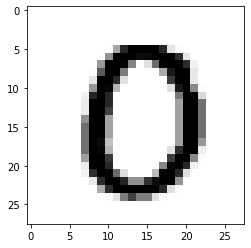

In [70]:
plt.imshow(X_train[10], cmap="binary")

In [71]:
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Sequential

In [72]:
class OptimalLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.rates = []
        self.losses = []
        self.factor = factor
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [73]:
K.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [74]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [76]:
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [77]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
learning_rate_cb = OptimalLearningRate(factor = 1.005)

history = model.fit(X_train, y_train, epochs = 1, validation_data=(X_valid, y_valid), callbacks=[learning_rate_cb])

1719/1719 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.5928 - val_loss: nan - val_accuracy: 0.0958


In [ ]:
plt.plot(learning_rate_cb.rates, learning_rate_cb.losses)
plt.gca().set_xscale('log')
plt.hlines(min(learning_rate_cb.losses), min(learning_rate_cb.rates), max(learning_rate_cb.rates))
plt.axis([min(learning_rate_cb.rates), max(learning_rate_cb.rates), 0, learning_rate_cb.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.grid(True)

In [ ]:
K.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(300, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
optimizer = keras.optimizers.SGD(lr=3.5e-1)
model.compile(loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'], 
             optimizer=optimizer)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb], epochs=1000)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 10))
plt.grid()
plt.xlabel("epochs")

In [ ]:
keras.backend.eval(model.optimizer.lr)

In [ ]:
keras.utils.plot_model(model, "model_1.png", show_shapes=True)

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
print(dir(keras.initializers))